# BERT

## O que é?
BERT **(Devlin et al., 2019)** é um modelo de linguagem pré-treinado. O acrônimo se traduz em Bidirectional Encoder Representations from Transformers. Foi proposto por um grupo de pesquisa do Google, Google AI Language. A referência original se encontra em https://arxiv.org/abs/1810.04805.

Os autores descrevem duas estratégias para aplicação de representações de linguagem pré-treinadas para tarefas subsequentes: feature-based e fine-tuning. A abordagem feature-based, como usada em ELMo **(Peters et al., 2018a)**, https://arxiv.org/abs/1802.05365, usa arquiteturas para tarefas específicas que incluem representações pré-treinadas como features adicionais. A abordagem fine-tuning, como usada em Generative Pre-trained Transformer (OpenAI GPT) **(Radford et al., 2018)**, https://openai.com/blog/language-unsupervised/, introduz parâmetros minimais para tarefas específicas, e é treinada em tarefas subsequentes simplesmente ao fazer fine-tuning de todos os parâmetros pré-treinados.

Ambas as abordagens, ainda segundo os autores do BERT, compartilham da mesma objective function durante a fase de pré-treinamento, onde elas usam modelos de linguagem unidirecionais para aprender representações linguísticas gerais.

BERT, portanto, surge como "crítica" dessas técnicas: os autores defendem que essas abordagens limitam o poder de representações pré-treinadas já que seus modelos são unidirecionais, o que limita a escolha de arquiteturas que podem ser usadas durante a fase de pré-treinamento. BERT, então, adota um objetivo de pré-treinamento descrito como *masked language model (MLM)*. Tal modelo aleatóriamente seleciona e substitui alguns dos tokens de entrada por um token especial [MASK]. O objetivo é predizer o *vocabulary id* da "palavra mascarada", i.e., da palavra que foi substituída pelo token [MASK], baseado apenas em seu contexto. MLM habilita a representação a mesclar os contextos esquerdo e direito, o que permite pré-treinar um Transformer profundo bidirecional.

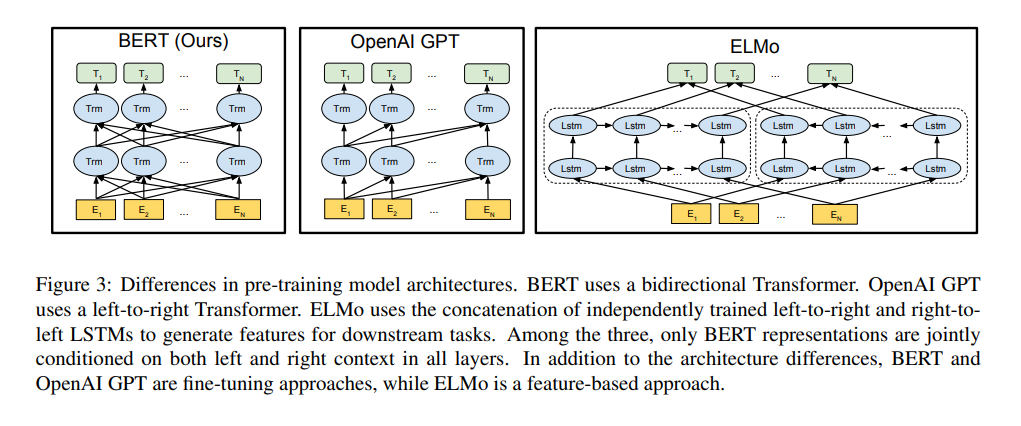

In [8]:
from IPython.display import Image
Image(filename="bert_arq_comparision.png", width=700, height=700)

# imagem disponível em https://arxiv.org/pdf/1810.04805.pdf

---

## Transformers
Falando em Transformer, trata-se de um arquitetura descrita por **(Vaswani et al., 2017)**, https://arxiv.org/abs/1706.03762, que preconiza o evitar de recorrências, se pautando inteiramente em um mecanismo de atenção para plotar dependências globais entre entrada e saída. Um trecho da introdução do paper é bem informativo a respeito:

*Recurrent models typically factor computation along the symbol positions of the input and output
sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden
states ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently
sequential nature precludes parallelization within training examples, which becomes critical at longer
sequence lengths, as memory constraints limit batching across examples.* ...

*Attention mechanisms have become an integral part of compelling sequence modeling and transduction models in various tasks, allowing modeling of dependencies without regard to their distance in
the input or output sequences.*

*In this work we propose the Transformer, a model architecture eschewing recurrence and instead
relying entirely on an attention mechanism to draw global dependencies between input and output.
The Transformer allows for significantly more parallelization and can reach a new state of the art in
translation quality after being trained for as little as twelve hours on eight P100 GPUs.*

---

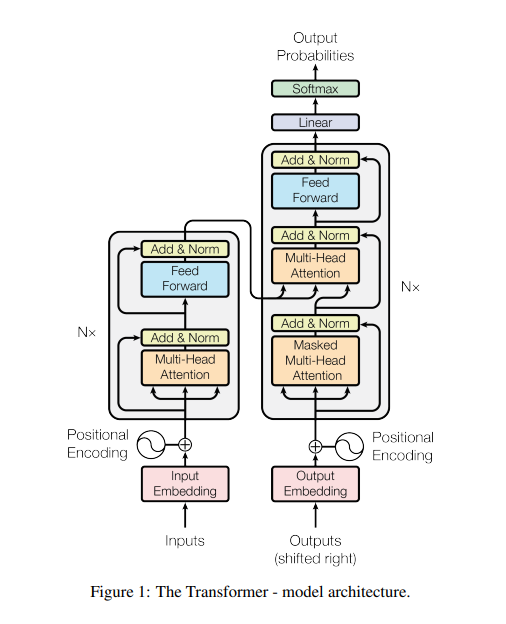

In [2]:
from IPython.display import Image
Image(filename="transformer.png", width=400, height=400)

# imagem disponível em https://arxiv.org/pdf/1706.03762.pdf

---

## Vida pós-BERT
O paper do BERT original foi lançado no arXiv em 24 de maio de 2019. Nesse ano que passou, várias abordagens baseadas nele foram criadas. Um bom sumário do que existe atualmente se encontra disponível em https://github.com/huggingface/transformers#model-architectures - esse repositório traz vários modelos já pré-treinados prontos para utilização.

---

## simpletransformers
A lib Simple Tranformers, https://simpletransformers.ai/, consiste essencialmente em um wrapper do [trabalho disponibilizado pelos confrades da huggingface](https://github.com/huggingface/transformers). A utilização é super simples, com criação, treinamento e avaliação de um modelo feitas em poucas linhas de código.

O código disponível abaixo foi feito baseado no disponível em https://medium.com/swlh/simple-transformers-multi-class-text-classification-with-bert-roberta-xlnet-xlm-and-8b585000ce3a, post do Medium do criador da lib Simple Transformers.

---

## Código

A linha abaixo serve para instalação do package apex, pra utilização de otimização via CUDA fp16. Mais detalhes em https://github.com/NVIDIA/apex. Tive problemas com a instalação via pip, e na documentação da lib SimpleTransformers, https://simpletransformers.ai/docs/installation/, é o procedimento recomendado. Para o meu desapontamento, ao menos em minha máquina, rodando o caderno via Colab, também não funcionou :(

In [14]:
!git clone https://www.github.com/nvidia/apex
%cd apex/
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
%cd ..

Cloning into 'apex'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 7153 (delta 104), reused 87 (delta 55), pack-reused 7012
Receiving objects: 100% (7153/7153), 13.83 MiB | 21.59 MiB/s, done.
Resolving deltas: 100% (4818/4818), done.


In [22]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-u_x274zc
Created temporary directory: /tmp/pip-req-tracker-a_d7ravy
Created requirements tracker '/tmp/pip-req-tracker-a_d7ravy'
Created temporary directory: /tmp/pip-install-vlccfklx
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-z2vuz1tk
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-a_d7ravy'
    Running setup.py (path:/tmp/pip-req-build-z2vuz1tk/setup.py) egg_info for package from file:///content/apex
    Running command python setup.py egg_info
    torch.__version__  =  1.5.0+cu101
    running egg_info
    creating /tmp/pip-req-build-z2vuz1tk/pip-egg-info/apex.egg-info
    writing /tmp/pip-req-build-z2vuz1tk/pip-egg-info/apex.egg-info/PKG-I

Aqui vem a instalação da lib simpletransformers. Basicamente é um wrapper de transformers de modelos pré-treinados. São várias opções disponíveis. Detalhes constam na documentação - muito boa, por sinal - no link https://simpletransformers.ai/.

In [23]:
!pip install simpletransformers

## Iniciando os trabalhos

De início, importamos Pandas e train_test_split do SciKit Learn para lidar com os datasets em .csv.

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
# bloco de inserção de dados: trabalho Pedro
'''
papers = pd.read_csv('train.csv')
papers.head()

hey = pd.DataFrame()
colunas_selec = papers[['text', 'label']]
hey = colunas_selec.copy()
hey.head()

mapeando = pd.DataFrame()
colunas_selec = papers[['label']]
mapeando = colunas_selec.copy()
mapeando.head()

dict_mapping = mapeando['label'].to_dict()
print(dict_mapping)
#print(dict_mapping['label'].items())
#for key in dict_mapping.itens():
#  vai = 

# dicionário para mapear labels em inteiros
new_dict = {} 
for key, value in dict_mapping.items(): 
   if value in new_dict: 
       new_dict[value].append(key) 
   else: 
       new_dict[value]=[key]

#swapped_dict = {value:key for key, value in dict_mapping.items()}
print(new_dict)

D = {'label': new_dict}
print(D)
hey = hey.replace({"label":new_dict})
#hey = hey["label"].replace(swapped_dict, inplace=True)
hey.head()
'''

,label
0,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA
1,SECRETARIA DE ESTADO DE CULTURA
2,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA
3,"SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO,..."
4,CASA CIVIL


A princípio, minha intenção era usar o conjunto de dados criado pelo Pedro, https://cic.unb.br/~teodecampos/KnEDLe/propor2020/. No entanto, para um primeiro teste, usei o conjunto de dados fornecido pelo professor Vinicius, disponível em https://github.com/oraclesknedle/text_collections. Contanto que textos estejam na coluna 0 e labels na coluna, indexados a partir de 0, o próprio wrapper se responsabiliza em lidar com os dados.

In [26]:
papers = pd.read_csv('compscience_papers.csv')
papers.head()

papers['label'] = papers['label'].apply(lambda x:x-1)
papers.head()

,text,label
0,Digital Image Similarity for Geo-spatial Knowl...,0
1,An Initial Experiment into Stereochemistry-Bas...,1
2,Collaborative Case-Based Recommender Systems\n...,0
3,Knowledge Engineering for CBR systems from a C...,0
4,Analyses for Elucidating Current Question Answ...,2


Após importar os dados do dataset compscience_papers, fazemos o split em treino e teste.

In [27]:
# create training and testing vars
train_df, test_df = train_test_split(papers, test_size=0.25)
train_df.head()
test_df.head()

,text,label
514,A Case-Based Reasoner Adaptive to Different Co...,0
413,Applying a Hybrid Query Translation Method to ...,2
336,An Interaction Model to Scientific Visualizati...,4
618,Adaptation Through Interpolation for Time-Crit...,0
395,A cross-modal electronic travel aid device ...,3


## Modelo

Criar um modelo via simpletransformers é muito simples. Basta fazer um import e instanciar um objeto da classe escolhida. Novamente, uma lista completa dos modelos disponíveis está disponível na documentação da lib Transformers, do pessoal da Hugging Face - https://huggingface.co/transformers/pretrained_models.html. 

O modelo RoBERTa foi escolhido apenas por ser o usado no tutorial de referência. O paper se encontra em https://arxiv.org/pdf/1907.11692.

A flag use_cuda foi setada como falsa aqui apenas pelos contratempos com a instalação da lib apex.

In [0]:
from simpletransformers.classification import ClassificationModel

# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=5, use_cuda=False)

Treinamos o modelo com o método train_model. Sem a otimização CUDA, o tempo de treinamento do modelo via CPU Colab foi de 10 minutos.

In [34]:
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:263: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running loss: 0.445382

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 1.137188


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Ajuste de métricas e call do método evaluation.

In [37]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:683: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Print dos resultados. 
- F1 score foi de 74,26%
- Acurácia 74,26%

In [38]:
print(result)

{'mcc': 0.6642167770933649, 'f1': 0.7426900584795322, 'acc': 0.7426900584795322, 'eval_loss': 0.5737996694039215}
